**What is a brain tumor?**
A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

**The importance of the subject**
Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore

**Methods**
The application of deep learning approaches in context to improve health diagnosis is providing impactful solutions. According to the World Health Organization (WHO), proper brain tumor diagnosis involves detection, brain tumor location identification, and classification of the tumor on the basis of malignancy, grade, and type. This experimental work in the diagnosis of brain tumors using Magnetic Resonance Imaging (MRI) involves detecting the tumor, classifying the tumor in terms of grade, type, and identification of tumor location. This method has experimented in terms of utilizing one model for classifying brain MRI on different classification tasks rather than an individual model for each classification task. The Convolutional Neural Network (CNN) based multi-task classification is equipped for the classification and detection of tumors. The identification of brain tumor location is also done using a CNN-based model by segmenting the brain tumor.

# IMPORTING LIBRARIES:

In [1]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import random
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# READING THE DATASET:

In [2]:
train_dir = '/kaggle/input/brain-tumor-mri-dataset/Training/'
test_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

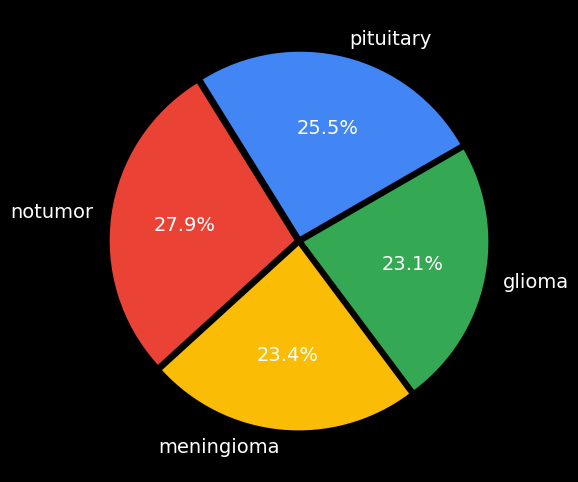

In [3]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='notumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

# AS WE CAN SEE THAT THE DATASET IS REASONABLY BALANCED.

### Creating two empty lists, "test_paths" and "test_labels", and iterates through the folders within the testing dataset directory to append the file paths and their corresponding labels to the appropriate lists. It also shuffles the order of the file paths and labels.

In [4]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

### Creating a pie chart that represents the distribution of train and test datasets. The chart shows the percentage of each label, "train" and "test" in the dataset. The colors of the chart are defined as specific RGB values, and the chart is labeled accordingly. The chart also has an "explode" feature which separates each slice of the pie chart by a small margin.





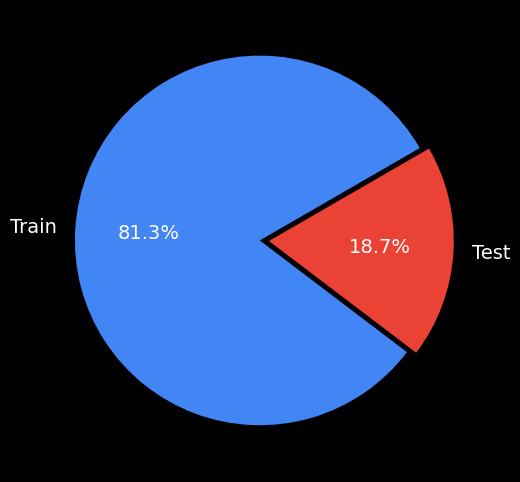

In [5]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

# DATA AUGMENTATION:

In [6]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

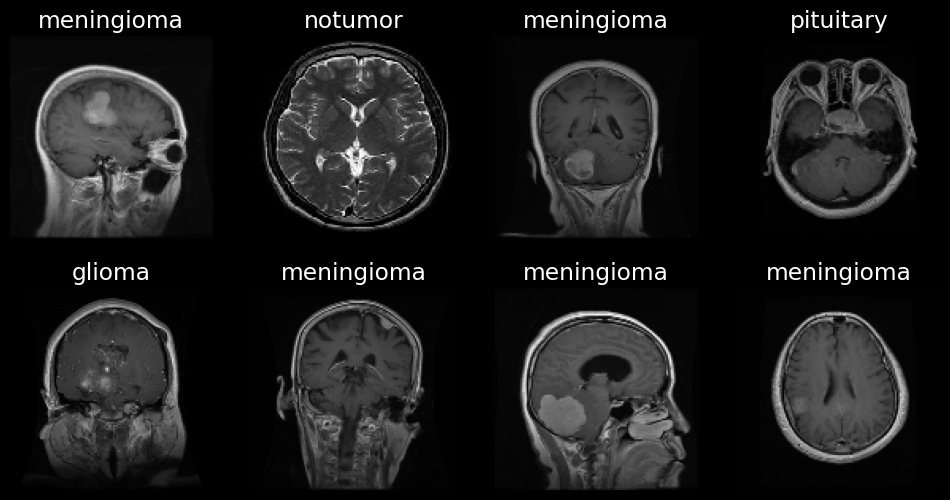

In [7]:
IMAGE_SIZE = 128

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

# DATA GENERATOR HELPS AUGMENT IMAGES, NORMALIZES THEM.

In [8]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

# MODEL:

## WE ARE USING VGG16 FOR TRANSFER LEARNING.

In [9]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

58889256/58889256 [==============================] - 2s 0us/step


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15,763,908
Trainable params: 8,128,644
Non

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

# TRAINING THE MODEL:

In [12]:
batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 5
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 [==============================] - 648s 2s/step - loss: 0.4537 - sparse_categorical_accuracy: 0.8233
Epoch 2/5
285/285 [==============================] - 641s 2s/step - loss: 0.2266 - sparse_categorical_accuracy: 0.9113
Epoch 3/5
285/285 [==============================] - 661s 2s/step - loss: 0.1644 - sparse_categorical_accuracy: 0.9375
Epoch 4/5
285/285 [==============================] - 647s 2s/step - loss: 0.1100 - sparse_categorical_accuracy: 0.9587
Epoch 5/5
285/285 [==============================] - 646s 2s/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9686


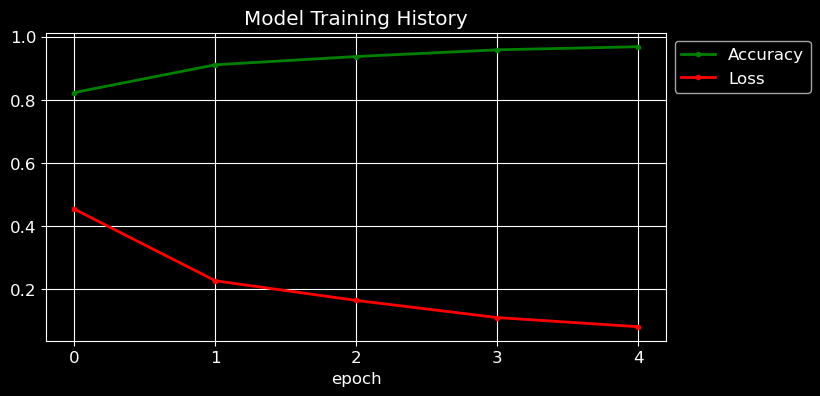

In [13]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# EVALUATING MODEL WITH TEST SAMPLES:

Trained model to make predictions on the test set, which consists of the test_paths and test_labels. It uses the datagen() function to generate batches of images and labels, and for each batch it uses the model.predict() method to make predictions on the images. The predicted labels are in encoded form and using decode_label() function they are decoded and stored in y_pred. The actual labels are stored in y_true. The tqdm library is used to display a progress bar for the loop.





In [14]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/40 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  2%|▎         | 1/40 [00:03<02:14,  3.44s/it]

1/1 [==============================] - 3s 3s/step


  5%|▌         | 2/40 [00:06<02:04,  3.27s/it]

1/1 [==============================] - 3s 3s/step


  8%|▊         | 3/40 [00:09<01:59,  3.22s/it]

1/1 [==============================] - 3s 3s/step


 10%|█         | 4/40 [00:13<02:01,  3.39s/it]

1/1 [==============================] - 3s 3s/step


 12%|█▎        | 5/40 [00:16<01:55,  3.29s/it]

1/1 [==============================] - 3s 3s/step


 15%|█▌        | 6/40 [00:19<01:50,  3.24s/it]

1/1 [==============================] - 3s 3s/step


 18%|█▊        | 7/40 [00:22<01:45,  3.20s/it]

1/1 [==============================] - 3s 3s/step


 20%|██        | 8/40 [00:25<01:41,  3.18s/it]

1/1 [==============================] - 3s 3s/step


 22%|██▎       | 9/40 [00:29<01:38,  3.17s/it]

1/1 [==============================] - 3s 3s/step


 25%|██▌       | 10/40 [00:32<01:35,  3.18s/it]

1/1 [==============================] - 3s 3s/step


 28%|██▊       | 11/40 [00:35<01:31,  3.17s/it]

1/1 [==============================] - 3s 3s/step


 30%|███       | 12/40 [00:38<01:28,  3.15s/it]

1/1 [==============================] - 3s 3s/step


 32%|███▎      | 13/40 [00:41<01:25,  3.16s/it]

1/1 [==============================] - 3s 3s/step


 35%|███▌      | 14/40 [00:45<01:23,  3.22s/it]

1/1 [==============================] - 3s 3s/step


 38%|███▊      | 15/40 [00:48<01:20,  3.23s/it]

1/1 [==============================] - 3s 3s/step


 40%|████      | 16/40 [00:51<01:17,  3.22s/it]

1/1 [==============================] - 3s 3s/step


 42%|████▎     | 17/40 [00:54<01:13,  3.19s/it]

1/1 [==============================] - 3s 3s/step


 45%|████▌     | 18/40 [00:57<01:09,  3.18s/it]

1/1 [==============================] - 3s 3s/step


 48%|████▊     | 19/40 [01:00<01:06,  3.17s/it]

1/1 [==============================] - 3s 3s/step


 50%|█████     | 20/40 [01:04<01:03,  3.15s/it]

1/1 [==============================] - 3s 3s/step


 52%|█████▎    | 21/40 [01:07<00:59,  3.14s/it]

1/1 [==============================] - 3s 3s/step


 55%|█████▌    | 22/40 [01:10<00:56,  3.14s/it]

1/1 [==============================] - 3s 3s/step


 57%|█████▊    | 23/40 [01:13<00:53,  3.15s/it]

1/1 [==============================] - 3s 3s/step


 60%|██████    | 24/40 [01:16<00:50,  3.18s/it]

1/1 [==============================] - 3s 3s/step


 62%|██████▎   | 25/40 [01:20<00:48,  3.25s/it]

1/1 [==============================] - 3s 3s/step


 65%|██████▌   | 26/40 [01:23<00:44,  3.21s/it]

1/1 [==============================] - 3s 3s/step


 68%|██████▊   | 27/40 [01:26<00:41,  3.18s/it]

1/1 [==============================] - 3s 3s/step


 70%|███████   | 28/40 [01:29<00:38,  3.17s/it]

1/1 [==============================] - 3s 3s/step


 72%|███████▎  | 29/40 [01:32<00:34,  3.16s/it]

1/1 [==============================] - 3s 3s/step


 75%|███████▌  | 30/40 [01:35<00:31,  3.14s/it]

1/1 [==============================] - 3s 3s/step


 78%|███████▊  | 31/40 [01:38<00:28,  3.14s/it]

1/1 [==============================] - 3s 3s/step


 80%|████████  | 32/40 [01:42<00:25,  3.15s/it]

1/1 [==============================] - 3s 3s/step


 82%|████████▎ | 33/40 [01:45<00:22,  3.15s/it]

1/1 [==============================] - 3s 3s/step


 85%|████████▌ | 34/40 [01:48<00:18,  3.14s/it]

1/1 [==============================] - 3s 3s/step


 88%|████████▊ | 35/40 [01:51<00:16,  3.29s/it]

1/1 [==============================] - 3s 3s/step


 90%|█████████ | 36/40 [01:55<00:12,  3.25s/it]

1/1 [==============================] - 3s 3s/step


 92%|█████████▎| 37/40 [01:58<00:09,  3.23s/it]

1/1 [==============================] - 3s 3s/step


 95%|█████████▌| 38/40 [02:01<00:06,  3.20s/it]

1/1 [==============================] - 3s 3s/step


 98%|█████████▊| 39/40 [02:04<00:03,  3.17s/it]

1/1 [==============================] - 3s 3s/step


100%|██████████| 40/40 [02:07<00:00,  3.16s/it]

1/1 [==============================] - 3s 3s/step


41it [02:10,  3.19s/it]


In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.91      0.94      0.92       300
  meningioma       0.90      0.92      0.91       306
     notumor       0.99      0.99      0.99       405
   pituitary       1.00      0.94      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



# Let's Check about the working of the model:

In [16]:
def names(number):
    if number==0:
        return 'No, Its not a tumor'
    else:
        return 'Its a Tumor'

In [17]:
from PIL import Image

100.0% Conclusion: Its a Tumor


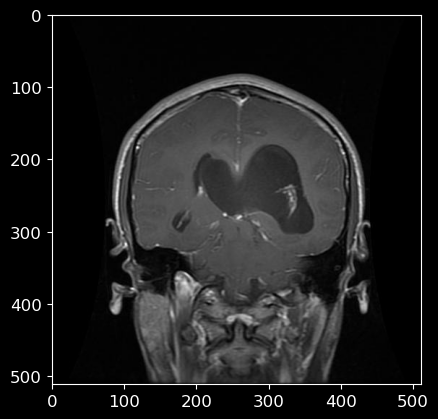

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-glTr_0002.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Conclusion: ' + names(classification))

100.0% Conclusion: Its a Tumor


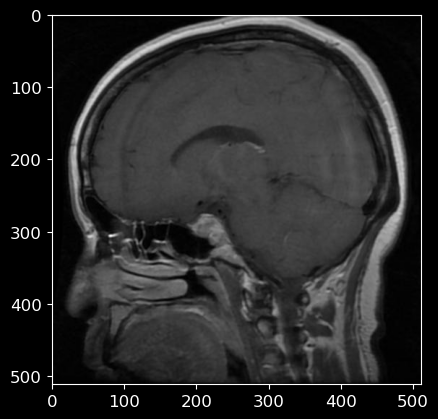

In [19]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0004.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Conclusion: ' + names(classification))

100.0% Conclusion: Its a Tumor


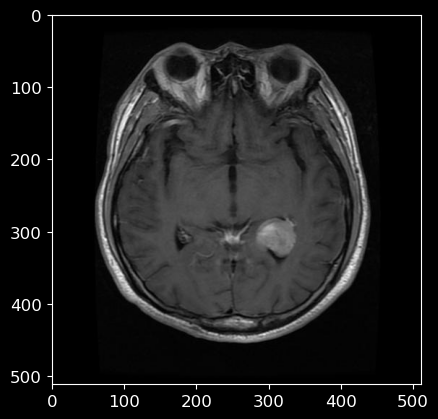

In [20]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-mri-dataset/Training/meningioma/Tr-meTr_0001.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Conclusion: ' + names(classification))

100.0% Conclusion: No, Its not a tumor


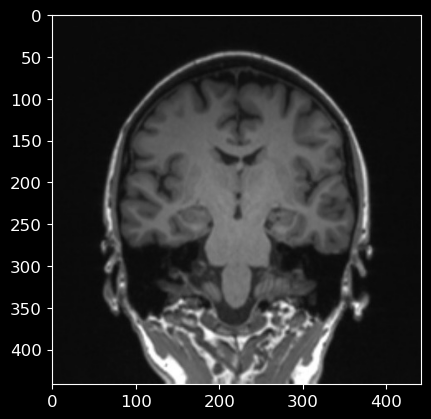

In [21]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'   
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-noTr_0004.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Conclusion: ' + names(classification))

<h4>A deep leaning model able to detect brain tumour with 100% accuracy.<h4>